# Using `TensorFlow Datasets`

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).

**TensorFlow Datasets is a collection of datasets ready to use, with TensorFlow or other Python ML frameworks.**

![image-tfds](https://www.tensorflow.org/resources/images/kyd-screenshot_480.jpg)


In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds


**All dataset builders are subclass of `tfds.core.DatasetBuilder`. To get the list of [available builders](https://www.tensorflow.org/datasets/catalog/overview), use `tfds.list_builders()`.**


In [3]:
print(tfds.list_builders())


['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'criteo', 'cs_restaurants', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_ad

### For this example, we are using the `beans`

[**Beans**](<[https://github.com/AI-Lab-Makerere/ibean/](https://github.com/AI-Lab-Makerere/ibean/)>) is a dataset of images of beans taken in the field using smartphone cameras. It consists of 3 classes: _2 disease classes and the healthy class_. Diseases depicted include **Angular Leaf Spot** and **Bean Rust**. Data was annotated by experts from the _National Crops Resources Research Institute_ (**NaCRRI**) in Uganda and collected by the _Makerere AI research lab_.


### `tfds.load`

The easiest way of loading a dataset is `tfds.load`. It will:

1.  Download the data and save it as `tfrecord` files.
2.  Load the `tfrecord` and create the `tf.data.Dataset`.

- `split=`: Which split to read (e.g. `'train'`, `['train', 'test']`).
- `shuffle_files=`: Control whether to shuffle the files between each epoch.
- `data_dir=`: Location where the dataset is saved ( defaults to `~/tensorflow_datasets/`)
- `with_info=True`: Returns the `tfds.core.DatasetInfo` containing dataset metadata
- `download=False`: Disable download
- `as_supervised`: Gives you a tuple (features, label) instead for supervised datasets


In [31]:
train_ds, validation_ds, test_ds = tfds.load(
    'beans',
    split=['train', 'validation', 'test'],
    shuffle_files=True,
    as_supervised=True,
)

sample = train_ds.take(10)

print(train_ds, test_ds)

for image, label in sample:
    print(image.shape, label)


<PrefetchDataset element_spec=(TensorSpec(shape=(500, 500, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> <PrefetchDataset element_spec=(TensorSpec(shape=(500, 500, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(0, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(2, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(2, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(2, shape=(), dtype=int64)
(500, 500, 3) tf.Tensor(1, shape=(), dtype=int64)


### Visualization

#### tfds.as_dataframe

`tf.data.Dataset` objects can be converted to `pandas.DataFrame` with `tfds.as_dataframe` to be visualized.

- Add the `tfds.core.DatasetInfo` as second argument of `tfds.as_dataframe` to visualize images, audio, texts, videos, etc.
- Use `ds.take(x)` to only display the first `x` examples (_`pandas.DataFrame` will load the full dataset in-memory, and can be very expensive to display_).


,image,label
0,,1 (bean_rust)
1,,1 (bean_rust)
2,,0 (angular_leaf_spot)
3,,0 (angular_leaf_spot)
4,,1 (bean_rust)

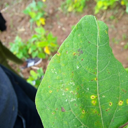
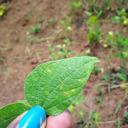
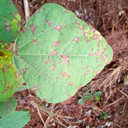
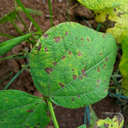
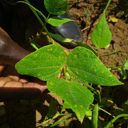

,image,label
0,,0 (angular_leaf_spot)
1,,1 (bean_rust)
2,,1 (bean_rust)
3,,1 (bean_rust)
4,,2 (healthy)

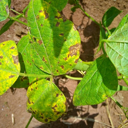
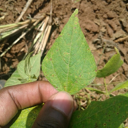
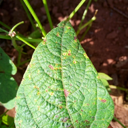
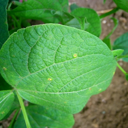
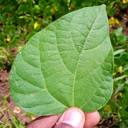

In [33]:
from IPython.display import display
x_train, info_train = tfds.load('beans', split='train', with_info=True)
x_test, info_test = tfds.load('beans', split='test', with_info=True)


display(tfds.as_dataframe(x_train.take(5), info_train))
display(tfds.as_dataframe(x_test.take(5), info_test))


#### tfds.show_examples

- `tfds.show_examples` returns a `matplotlib.figure.Figure`.


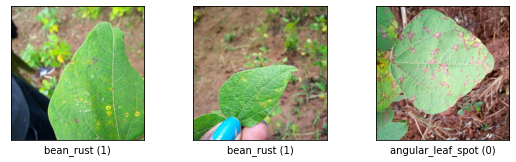

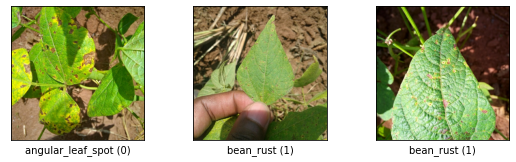

In [34]:
fig = tfds.show_examples(x_train.take(3), info_train)
fig = tfds.show_examples(x_test.take(3), info_test)


### Access the dataset metadata

**All builders include a `tfds.core.DatasetInfo` object containing the dataset metadata.**

```python

import tensorflow_datasets as tfds

builder = tfds.builder('beans')
info = builder.info

print(info)

```


In [35]:
display(info_train)


tfds.core.DatasetInfo(
    name='beans',
    full_name='beans/0.1.0',
    description="""
    Beans is a dataset of images of beans taken in the field using smartphone
    cameras. It consists of 3 classes: 2 disease classes and the healthy class.
    Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated
    by experts from the National Crops Resources Research Institute (NaCRRI) in
    Uganda and collected by the Makerere AI research lab.
    """,
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    data_path='~\\tensorflow_datasets\\beans\\0.1.0',
    file_format=tfrecord,
    download_size=171.69 MiB,
    dataset_size=171.63 MiB,
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=128, num_shards=1>,
        'train': 

#### Features metadata (label names, image shape, etc.)

Access the `tfds.features.FeatureDict`:

```python
import tensorflow_datasets as tfds

builder = tfds.builder('beans')

info = builder.info
info.features

```


In [38]:
print(info_train.features["label"].num_classes)
print(info_train.features["label"].names)
print(info_train.features["label"].int2str(2))  # Human readable version
print(info_train.features["label"].str2int('healthy'))


3
['angular_leaf_spot', 'bean_rust', 'healthy']
healthy
2


#### As numpy `tfds.as_numpy`

**Uses `tfds.as_numpy` to convert:**

- `tf.Tensor` -> `np.array`
- `tf.data.Dataset` -> `Iterator[Tree[np.array]]`

**By using `batch_size=-1`, you can load the full dataset in a single batch.**

**This can be combined with `as_supervised=True` and `tfds.as_numpy` to get the the data as `np.array`.**


(1034, 500, 500, 3) (1034,)
(133, 500, 500, 3) (133,)
(128, 500, 500, 3) (128,)


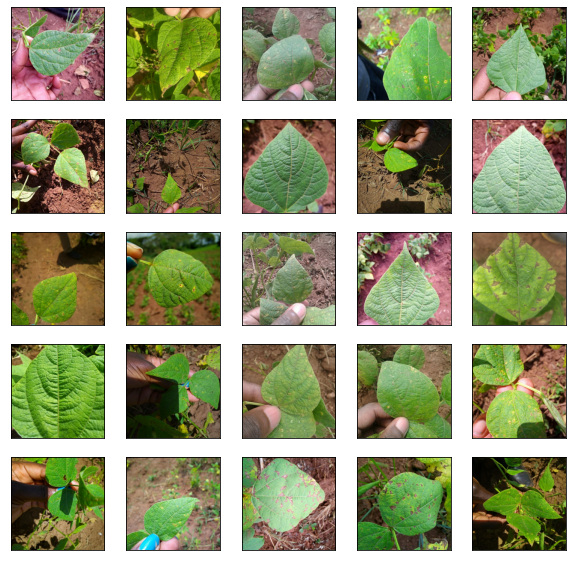

In [41]:
import matplotlib.pyplot as plt
x_train, y_train = tfds.as_numpy(tfds.load(
    'beans',
    split='train',
    batch_size=-1,
    shuffle_files=True,
    as_supervised=True,
))

x_val, y_val = tfds.as_numpy(tfds.load(
    'beans',
    split='validation',
    batch_size=-1,
    shuffle_files=True,
    as_supervised=True,
))

x_test, y_test = tfds.as_numpy(tfds.load(
    'beans',
    split='test',
    batch_size=-1,
    shuffle_files=True,
    as_supervised=True,
))

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)


plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()


**Now you have access to an infidity of datasets to practice ML! 🙃**

---

Return to the [castle](https://github.com/Nkluge-correa/teeny-tiny_castle).
